# Hypothesis Testing Continued!!!

![Hypothesis Meme](https://i.redd.it/4v4nmp2v52n11.jpg)


## Things We Covered

- Hypothesis testing  != Statistical Methods (T Test, Chi Squared, Shapiro-Wilk Test, Pearson Correlation...)

- Hypothesis testing does not provided definative, absolute awnsers 

- Hypothesis testing provides a methodology to acquire confidence about assumptions and allows analysts to make inferences about some data based upon a probabilistic confidence. 

![Hypothesis Test Viz](https://www.researchgate.net/profile/Le_Nhan15/publication/331206334/figure/fig3/AS:747593277652994@1555251535982/Statistical-hypothesis-testing-test-d-allowing-to-guarantee-a-prefixed-false-alarm-rate-l.png)



In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
# lets pull in some data to do some analysis and hypothesis testing against
# this dataset is demographic information on a polled group of US adults

adults = pd.read_csv("https://raw.githubusercontent.com/Jaunson/Scripts/master/adult.csv",
                     names=['Unnamed: 0','age','workclass', 'fnlwgt', 'education',
                            'education_num', 'marital_status', 'occupation', 'relationship', 'race',
                            'sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'transport'],
                    skiprows=1)

# Some fixing for this data to strip out unneed spaces, always fix your data first it makes it analysis smoother
adults['education'] = adults.education.str.strip()
adults['workclass'] = adults.workclass.str.strip()
adults['marital_status'] = adults.marital_status.str.strip()
adults['occupation'] = adults.occupation.str.strip()
adults['relationship'] = adults.relationship.str.strip()
adults['race'] = adults.race.str.strip()
adults['sex'] = adults.sex.str.strip()
adults['native_country'] = adults.native_country.str.strip()
adults['transport'] = adults.transport.str.strip()
adults = adults.drop("Unnamed: 0", axis=1)
adults['native'] = ['Native' if x=="United-States" else 'Non-Native' for x in adults['native_country']]

In [29]:


us_male_education = adults.query('native=="Native" & sex=="Male"')['education_num']

#Taking a random sampling from our us_male_education array so its the same size as the female sample

us_male_education = pd.Series(np.random.choice(us_male_education, 1089, replace=False), name='male_education_num')

f_female_education = adults.query('native=="Non-Native" & sex=="Female"')['education_num']

In [82]:
education = pd.DataFrame({'male_education_level':us_male_education,'female_education_level':f_female_education})



In [80]:
# get our arrays moving so we can start doing the calcs required for a t-test
male = np.array(education['male_education_level'].dropna())
female = np.array(education['male_education_level'].dropna())

In [81]:
#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_male = male.var(ddof=1)
var_female = female.var(ddof=1)

In [77]:
#std deviation
s= np.sqrt((var_male+var_female)/2)

In [78]:
# Calculate the t-statistics
t = (male.mean() - female.mean())/(s*np.sqrt(2/len(male)))

In [79]:
## Compare with the critical t-value
#Degrees of freedom
df = 2*len(male) - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))


t = 0.0
p = 1.0
t = 0.0
p = 1.0


t = 0.0
p = 1.0


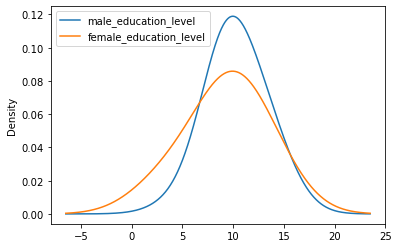

In [83]:
plot = education.plot.kde(bw_method=1)
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(male,female)
print("t = " + str(t2))
print("p = " + str(p2))

We fail to reject the null hypothesis, meaning we cannot say with statistical certainty that there is a difference between mean values of both populations